# DNN to CNN in mnist handwriting
******************
    based on tensorflow 2.0

## Plot the first 25 mnist samples

In [95]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

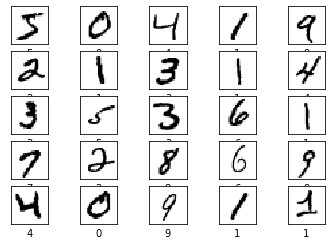

In [97]:
import matplotlib.pyplot as plt

class_names=['0','1', '2', '3', '4', '5','6', '7', '8', '9']
plt.figure()
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## Training by DNN
******************
    With the struture of flatten layer->fully-connected layer(relu)->dropout->fully connected(softmax)
 

In [98]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [99]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [100]:
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_1.fit(x_train, y_train, epochs=5)
loss=model_1.evaluate(x_test, y_test)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 196us/sample - loss: 0.2199 - accuracy: 0.9346
Epoch 2/5
60000/60000 [==============================] - 11s 187us/sample - loss: 0.0957 - accuracy: 0.9710
Epoch 3/5
60000/60000 [==============================] - 10s 160us/sample - loss: 0.0682 - accuracy: 0.9791
Epoch 4/5
60000/60000 [==============================] - 10s 167us/sample - loss: 0.0547 - accuracy: 0.9823
Epoch 5/5
10000/10000 [==============================] - 1s 71us/sample - loss: 0.0662 - accuracy: 0.9807


## Checking the faultys

### initializing the array to storing the args 

In [101]:
lossrate=1-loss[1]

In [102]:
import numpy as np
arg=np.zeros((1,np.ceil(lossrate*len(x_test)).astype(int)), dtype=int)

In [103]:
cache=np.zeros((1,len(x_test)))

In [104]:
predictions=model_1.predict(x_test)
for i in range(len(x_test)):
    cache[0,i] = np.argmax(predictions[i])

In [105]:
j = 0
for i in range(len(x_test)):
    if cache[0,i] != y_test[i]:
        arg[0,j] = i
        j += 1

In [125]:
count = 0
for i in range(np.size(arg)):
    if arg[0,i] != 0:
        count += 1
arg

array([[ 233,  247,  274,  321,  340,  381,  445,  495,  578,  582,  619,
         659,  684,  691,  720,  877,  882,  947,  951,  956,  965, 1003,
        1014, 1039, 1112, 1166, 1182, 1194, 1226, 1232, 1242, 1247, 1319,
        1328, 1393, 1425, 1444, 1530, 1549, 1554, 1681, 1709, 1717, 1751,
        1782, 1800, 1850, 1880, 1901, 1987, 2004, 2018, 2033, 2040, 2053,
        2098, 2109, 2118, 2130, 2135, 2162, 2182, 2224, 2272, 2291, 2293,
        2369, 2381, 2387, 2406, 2414, 2422, 2454, 2462, 2488, 2582, 2597,
        2607, 2648, 2654, 2720, 2810, 2877, 2896, 2921, 2939, 2953, 2995,
        3012, 3030, 3073, 3117, 3172, 3251, 3284, 3289, 3422, 3475, 3503,
        3520, 3558, 3727, 3776, 3808, 3818, 3838, 3902, 3941, 3943, 3985,
        4065, 4140, 4176, 4193, 4201, 4224, 4248, 4289, 4369, 4437, 4443,
        4497, 4500, 4536, 4547, 4601, 4699, 4731, 4740, 4761, 4807, 4823,
        4880, 4956, 4978, 4990, 5138, 5586, 5642, 5719, 5734, 5757, 5937,
        5955, 5972, 5973, 6011, 6028, 

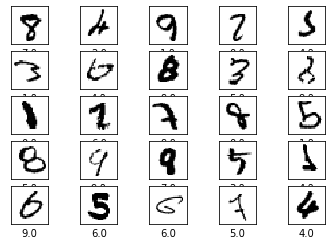

In [107]:
class_names=['0','1', '2', '3', '4', '5','6', '7', '8', '9']
plt.figure()
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[arg[0,i]], cmap=plt.cm.binary)
    plt.xlabel(cache[0,i])
plt.show()

## Training by CNN

In [108]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

x_train, x_test = x_train / 255.0, x_test / 255.0

In [109]:
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras import datasets, layers, models

In [110]:
model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [111]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [112]:
model_2.add(layers.Flatten())
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dense(10, activation='softmax'))

In [113]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)               

In [114]:
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_2.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 44s 728us/sample - loss: 0.1462 - accuracy: 0.9549
Epoch 2/5
60000/60000 [==============================] - 45s 753us/sample - loss: 0.0460 - accuracy: 0.9857
Epoch 3/5
60000/60000 [==============================] - 46s 768us/sample - loss: 0.0335 - accuracy: 0.9894
Epoch 4/5
60000/60000 [==============================] - 47s 775us/sample - loss: 0.0263 - accuracy: 0.9915
Epoch 5/5
60000/60000 [==============================] - 45s 754us/sample - loss: 0.0200 - accuracy: 0.9935


In [115]:
loss_2 = model_2.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 243us/sample - loss: 0.0418 - accuracy: 0.9873


In [153]:
def imerrorshow(model,x_test,y_test,loss):
    x_images=x_test.reshape(10000,28,28,1)
    lossrate=1-loss[1]
    arg=np.zeros((1,np.ceil(lossrate*len(x_test)).astype(int)), dtype=int)
    cache=np.zeros((1,len(x_test)))
    predictions=model.predict(x_images)
    for i in range(len(x_test)):
        cache[0,i] = np.argmax(predictions[i])
    j = 0
    for i in range(len(x_test)):
        if cache[0,i] != y_test[i]:
            arg[0,j] = i
            j += 1
    count = 0
    for i in range(np.size(arg)):
        if arg[0,i] != 0:
            count += 1
    class_names=['0','1', '2', '3', '4', '5','6', '7', '8', '9']
    plt.figure()
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_test[arg[0,i]], cmap=plt.cm.binary)
        plt.xlabel(cache[0,i])

In [154]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
imerrorshow(model_2,x_test,y_test,loss_2)

IndexError: index 128 is out of bounds for axis 1 with size 128

In [157]:
    j = 0
    for i in range(len(x_test)):
        if cache[0,i] != y_test[i]:
            j += 1
    j - np.size(arg)

0

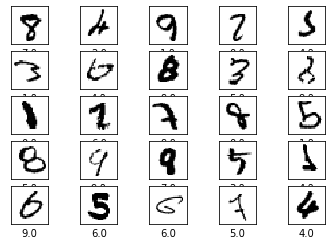

In [156]:
    j = 0
    for i in range(len(x_test)):
        if cache[0,i] != y_test[i]:
            arg[0,j] = i
            j += 1
    count = 0
    for i in range(np.size(arg)):
        if arg[0,i] != 0:
            count += 1
    class_names=['0','1', '2', '3', '4', '5','6', '7', '8', '9']
    plt.figure()
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_test[arg[0,i]], cmap=plt.cm.binary)
        plt.xlabel(cache[0,i])
    plt.show()

## CNN in Cifar 

In [168]:
cifar = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar.load_data()

170500096/170498071 [==============================] - 157s 1us/step


In [166]:
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras import datasets, layers, models

In [170]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.normlization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Conv2D(32, (3, 3), Activation('relu'),input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3)),)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


AttributeError: module 'tensorflow.python.keras.api._v2.keras.layers' has no attribute 'normlization'